Create data and data labels for each point

In [1]:
import sklearn
import collections
from collections import Counter
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12, 3, 3, 3, 3]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 21, 40, 40, 40]
data = list(zip(x, y))
labels = ["dog", "dog", "cat", "dog", "dog", "dog", "cat", "dog", "cat", "cat", "dog", "horse", "horse", "horse"] 

Create function that runs kmeans with a range of clusters with the data, test the accuracy (inertia) of different cluster numbers representing the raw data using the elbow method, return the optimal number of clusters

In [2]:
def K(data):
    import kneed
    import sklearn
    from kneed import KneeLocator
    from sklearn.cluster import KMeans

    inertias = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
    return kl.elbow

In [3]:
k = K(data)
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(n_clusters=3)

Create function that plots kmeans data based on the data and elbow method

In [4]:
    def plotKMeans(data): 
        """"
        input data,
        returns plot of data with kmeans applied to it, differnt colors represent different labels
        
        """
        import sklearn
        import matplotlib
        matplotlib.use('Qt5Agg')
        import matplotlib.pyplot as plt
        from sklearn.cluster import KMeans

        kmeans = KMeans(n_clusters=K(data))
        kmeans.fit(data)

        %matplotlib inline
        plt.scatter(x, y, c=kmeans.labels_)
        plt.show()
        
        print(kmeans.labels_)

In [5]:
#plotKMeans(data)

labelClusters
Input:
data, and labels associated with data

as kmeans randomly assigns labels to its clusters, it is the job of labelCLusters to find which real label is associated with the randomly generated ones. It does this by first creating a dictionary (tDict) that observes how many times each real label occurs with a randomly generated one. Another dictionary (sDict) is used to find which label is most associated with which random value. 

returns: sDict gets returned.

In [6]:
def labelClusters(klabels, labels):
    """"
    labelClusters Input: data, and labels associated with data

as kmeans randomly assigns labels to its clusters, it is the job of labelCLusters to find which real 
label is associated with the randomly generated ones. It does this by first creating a dictionary (tDict) that 
observes how many times each real label occurs with a randomly generated one. Another dictionary (sDict) is used 
to find which label is most associated with which random value.

returns: sDict gets returned.

    """
    
    import sklearn
    import collections
    from collections import Counter
    from sklearn.cluster import KMeans
    
    print(klabels)
    print(labels)
    
    tDict = {}
    sDict = {}
    gSList = set(labels)
    glist = []
    
    if len(set(kmeans.labels_)) != len(gSList):
        return "ERROR: number of clusters does not match with number of labels!"
    
#make dictionary of unique labels associated with clusters to later measure which is more associated with what clusters
    for x in gSList:
        glist.append(x)
        for l in range(len(gSList)):
            tDict[x + str(l)] = 0 #initialize total dictionary
            sDict[x] = 0
            
            
#put the actual values into dictionary that counts the number of cluster instances for each    
    
    for b in range(len(labels)): 
        for t in tDict:
            if t[:len(t)-1] == labels[b] and t[len(t)-1:] == str(klabels[b]):
                tDict[t] = tDict.get(t) + 1
    print(tDict)

    while len(glist) > 1:
        for x in range(len(gSList)-1):
            a = glist[0]
            for y in range(1, len(glist)):
                if tDict[a + str(x)] < tDict[glist[y] + str(x)]:
                    a = glist[y]
                sDict[a] = x
            glist.remove(a)
    sDict[glist[0]] = len(gSList)-1
    
                
    return sDict
    

In [7]:
dic = labelClusters(kmeans.labels_, labels)

[2 2 0 2 2 0 0 2 0 0 2 1 1 1]
['dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'horse', 'horse', 'horse']
{'horse0': 0, 'horse1': 3, 'horse2': 0, 'dog0': 1, 'dog1': 0, 'dog2': 6, 'cat0': 4, 'cat1': 0, 'cat2': 0}


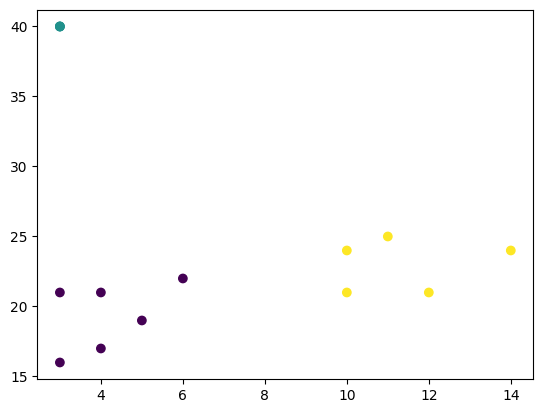

[0 0 2 0 0 2 2 0 2 2 0 1 1 1]


In [8]:
plotKMeans(data)

In [9]:
def getClusters(data, labels):
    """"
    input: data, labels
    returns tuple: cluster labels, number of clusters
    
    """
    
    y = K(data)
    gSList = set(labels)
    glist = []
    for x in gSList:
        glist.append(x)
    glist.append(y)
    v = tuple(glist)
    return v

In [10]:
getClusters(data, labels)

('horse', 'dog', 'cat', 3)

In [18]:
def assignClusters(klabels, labels):
    """"
    input: arbitrary k means labels, true labels
    
    converts arbitrary k means labels list into a list based on which arbitrary cluster is associated with which 
    real cluster (using labelClusters)
    
    returns: list of predicted clusters w/ true labels
    """
    
    tlist = []
    dictt = labelClusters(klabels, labels)
    for y in range(len(klabels)):
        for x in dictt:
            if dictt[x] == klabels[y]:
                tlist.append(x)
    return tlist

In [19]:
assignClusters(kmeans.labels_, labels)

[2 2 0 2 2 0 0 2 0 0 2 1 1 1]
['dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'horse', 'horse', 'horse']
{'horse0': 0, 'horse1': 3, 'horse2': 0, 'dog0': 1, 'dog1': 0, 'dog2': 6, 'cat0': 4, 'cat1': 0, 'cat2': 0}


['dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'horse',
 'horse',
 'horse']

In [24]:
def randIndex(data, labels):
    """"
    input: data, labels
    
    uses assign clusters and true cluster labels to measure accuracy of kmeans on data. rand index takes compares 
    how well the predicted clusters and the true clusters line up. getClusters is used to find cluster names and 
    predicted number of clusters (k) in final tuple
    
    return tuple: true cluster labels, predicted number of clusters, rand index
    """
    
    tup = list(getClusters(data, labels))
    
    p = assignClusters(kmeans.labels_, labels)
    
    tup.append(sklearn.metrics.rand_score(labels, p))
    
    return tuple(tup)

In [25]:
randIndex(data, labels)

[2 2 0 2 2 0 0 2 0 0 2 1 1 1]
['dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'horse', 'horse', 'horse']
{'horse0': 0, 'horse1': 3, 'horse2': 0, 'dog0': 1, 'dog1': 0, 'dog2': 6, 'cat0': 4, 'cat1': 0, 'cat2': 0}


('horse', 'dog', 'cat', 3, 0.8901098901098901)